In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 

In [4]:
df = pd.read_csv('netflix_titles.csv')

In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [7]:
#Series Vs Movies

In [42]:
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='Count'>

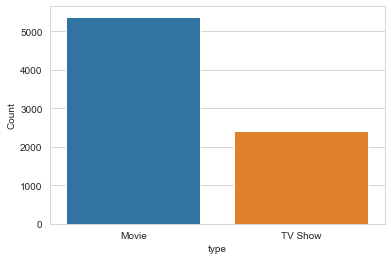

In [46]:
A = df['type'].value_counts()
A = A.reset_index()
A.columns = ['type','Count']
sns.barplot(x='type',y='Count',data=A)

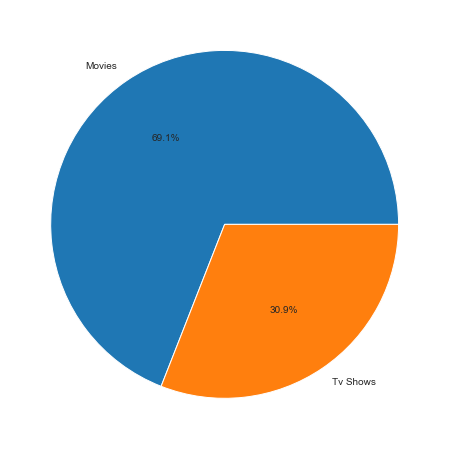

In [144]:
plt.figure(figsize=(8,8))
label= ["Movies","Tv Shows"]
plt.pie(A.Count, labels= label ,autopct= "%1.1f%%") 
plt.show()

In [141]:
#Country Analysis

In [31]:
B = df['country'].value_counts()[:20]
B = B.reset_index()
B.columns = ['Country','Count']
B.head()

,Country,Count
0,United States,2555
1,India,923
2,United Kingdom,397
3,Japan,226
4,South Korea,183


<AxesSubplot:xlabel='Count', ylabel='Country'>

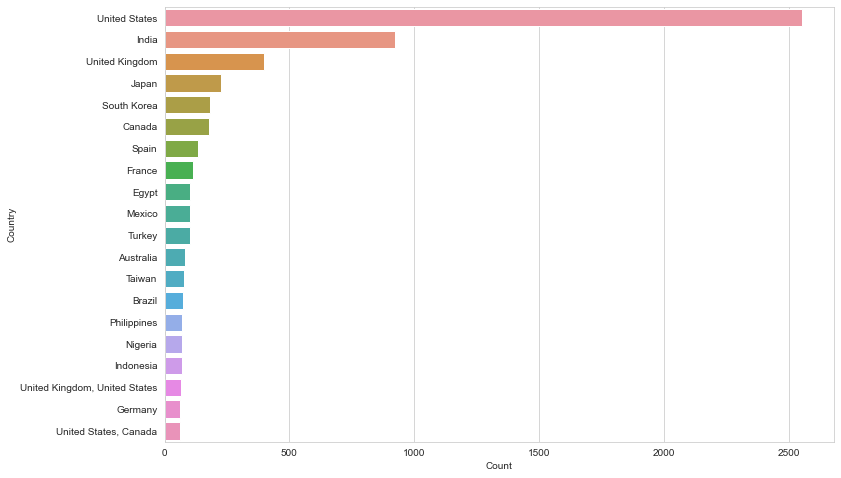

In [39]:
plt.figure(figsize=(12,8))
sns.set_context(font_scale=2)
sns.set_style('whitegrid')
sns.barplot(x='Count',y='Country',data=B)

In [37]:
#Year Wise Content

In [51]:
C = df['release_year'].value_counts()
C = C.reset_index()
C.columns = ['Release_Year','Count']
C

,Release_Year,Count
0,2018,1121
1,2017,1012
2,2019,996
3,2016,882
4,2020,868
...,...,...
68,1966,1
69,1947,1
70,1959,1
71,1964,1


<Figure size 1296x432 with 0 Axes>

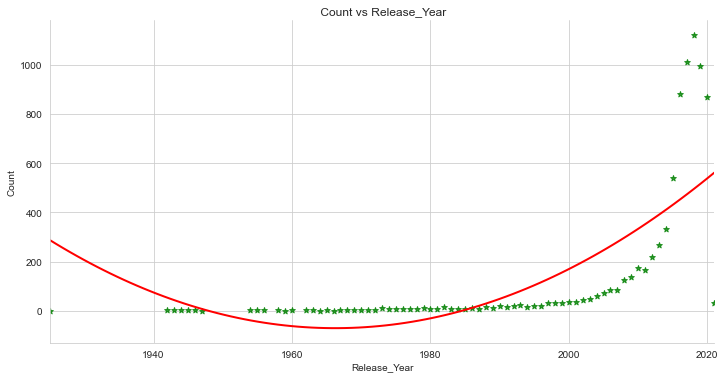

In [66]:
plt.figure(figsize=(18,6))
sns.lmplot(x="Release_Year", y="Count",data=C,markers="*",
           order=2, ci=None, scatter_kws={"color": "green"},
         line_kws={"linewidth":2,"color":"red"},aspect=2);
plt.title(" Count vs Release_Year");

In [77]:
#Rating

In [90]:
X = df['rating'].value_counts()
X = X.reset_index()
X.columns = ['rating','Count']
X

,rating,Count
0,TV-MA,2863
1,TV-14,1931
2,TV-PG,806
3,R,665
4,PG-13,386
5,TV-Y,280
6,TV-Y7,271
7,PG,247
8,TV-G,194
9,NR,84


Text(0.5, 1.0, 'Rating Vs Count')

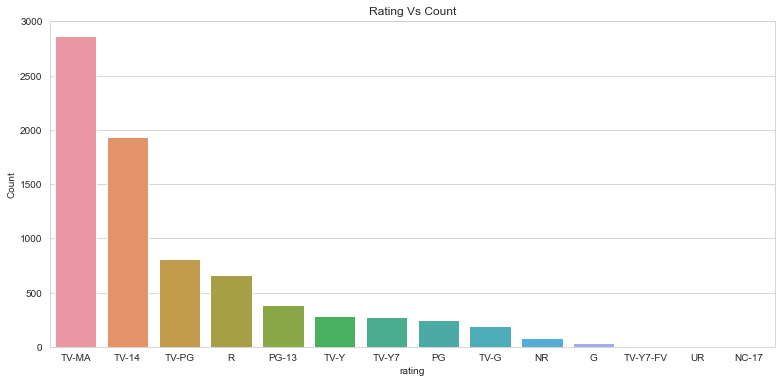

In [104]:
plt.figure(figsize=(13,6))
sns.set_context(font_scale=3)
sns.barplot(x='rating', y='Count',data=X)
plt.title('Rating Vs Count')

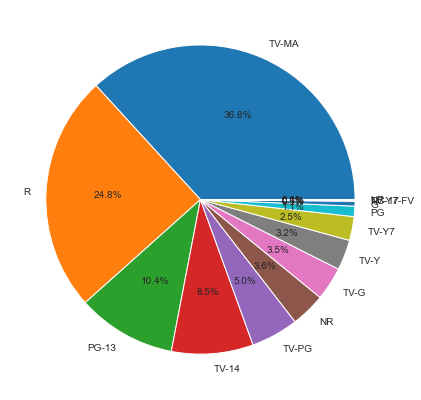

In [111]:
plt.figure(figsize=(6,10))
label= ['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR']
plt.pie(X.Count, labels= label ,autopct= "%1.1f%%") 
plt.tight_layout()
plt.show()

In [128]:
M = df[df['release_year']==2020]
s = len(M[M['rating']=='TV-14'])
print('There are ',s,'TV-14 rating movies in 2020')

There are  150 TV-14 rating movies in 2020


In [145]:
#Movies Vs Shows

In [130]:
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [146]:
#Movies Vs Tv-Shows based on Rating 

Text(0, 0.5, 'Count')

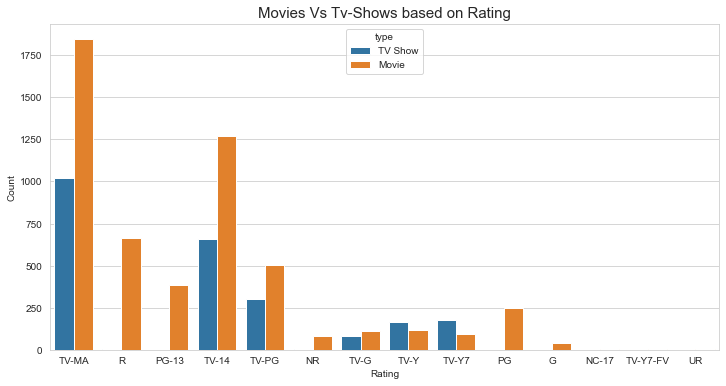

In [169]:
plt.figure(figsize = (12,6))
sns.countplot(x='rating',hue='type',data=df)
plt.title('Movies Vs Tv-Shows based on Rating',size='15') 
plt.xlabel('Rating',size='10')
plt.ylabel('Count',size='10')

In [ ]:
#'Last 5 years trends in Netflix by USA'

Text(0, 0.5, 'Count')

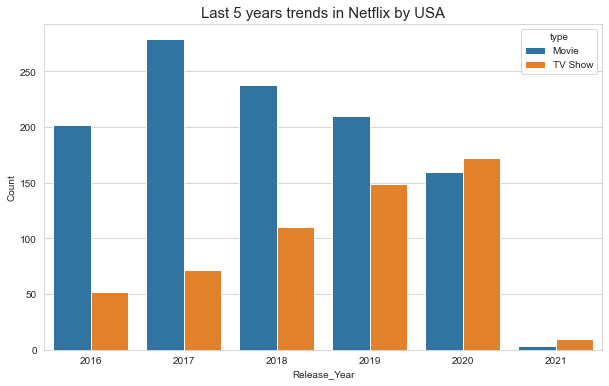

In [172]:
plt.figure(figsize = (10,6))
E = df[(df['release_year']>=2016) & (df['release_year']<=2021)]
sns.countplot(x='release_year',data=E[E['country']=='United States'],hue='type')
plt.title('Last 5 years trends in Netflix by USA',size='15')
plt.xlabel('Release_Year',size='10')
plt.ylabel('Count',size='10')

In [19]:
A = df[df['type']=='Movie']['country'].value_counts()[:5]
A = A.reset_index()
A.columns = ['Country','Count'] 
A

,Country,Count
0,United States,2080
1,India,852
2,United Kingdom,193
3,Canada,118
4,Spain,89


Text(0.5, 1.0, 'Contribution Of Countries In Movies')

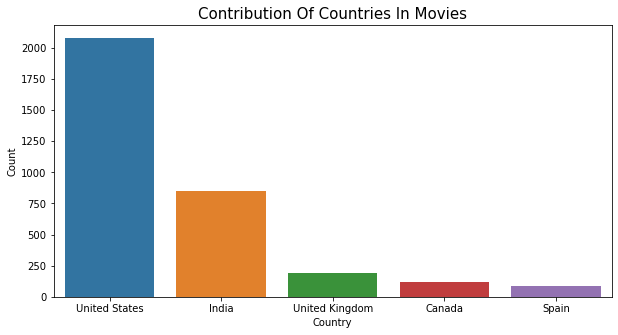

In [25]:
plt.figure(figsize = (10,5))
sns.barplot(x="Country", y="Count",data=A)
a.set_ylim([0,2000])
plt.title('Contribution Of Countries In Movies',size='15')

In [16]:
df["country"].value_counts().to_frame()
df["country"] = df["country"].fillna(df["country"].mode()[0])

In [18]:
df["country"].isnull().sum()

0

In [26]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [30]:
K = df[df['type']=='TV Show']['listed_in'].value_counts()

In [31]:
K

Kids' TV                                                            205
International TV Shows, TV Dramas                                   111
Crime TV Shows, International TV Shows, TV Dramas                   106
Kids' TV, TV Comedies                                                90
International TV Shows, Romantic TV Shows, TV Dramas                 86
                                                                   ... 
Crime TV Shows, Spanish-Language TV Shows, TV Action & Adventure      1
TV Action & Adventure, TV Comedies                                    1
Crime TV Shows, TV Comedies                                           1
Kids' TV, Reality TV, TV Dramas                                       1
Crime TV Shows, International TV Shows, Reality TV                    1
Name: listed_in, Length: 227, dtype: int64

In [36]:
P = df['country'].value_counts()
P = P.reset_index()
P.columns = ['country','Count']
P

,country,Count
0,United States,3062
1,India,923
2,United Kingdom,397
3,Japan,226
4,South Korea,183
...,...,...
676,"Canada, Germany",1
677,"United States, Spain, Germany",1
678,"France, Canada, Italy, United States, China",1
679,"South Africa, Nigeria",1


In [40]:
data = dict(type = 'choropleth',
           locations = P['country'],
           locationmode = "country names",
            colorscale='Virdis',
           text = P['country'],
           marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
           colorbar = {'title':'Population Of Countries in 2020' },
           z = P['Count']
           )
layout = dict(title = 'Population Of Countries in 2020',
              geo={'scope':'world'})
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)